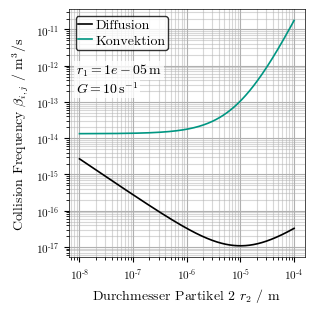

In [2]:
## ---- Imports ---- ##
import numpy as np
import math
import plotter.plotter as pt
from plotter.KIT_cmap import c_KIT_green, c_KIT_red, c_KIT_blue, c_KIT_orange, c_KIT_purple,  KIT_black_green_white
import matplotlib.pyplot as plt

# Plot setup
pt.plot_init(scl_a4=2,figsze=[6.4,6.4],lnewdth=0.8,mrksze=5,use_locale=True)

## ---- Parameterdefinitionen ---- ##
r1 = 1e-5                               # Radius Partikel 1
r2 = np.logspace(-8,-4,1000)            # Radius Partikel 2 (variabel / array)

mu = 1e-3                               # Dynamische Viskosität [Pa s]
G = 10                                  # Scherrate [1/s]
k = 1.38*1e-23                          # Boltzmann Konstante [J/K]    
T = 293                                 # Temperatur [K]
D1 = k*T/(6*math.pi*r1*mu)              # Diffusionskoeffizienz 1 [m^2/s]
D2 = k*T/(6*math.pi*r2*mu)              # Diffusionskoeffizienz 2 [m^2/s]
            
b_dif = 2*k*T*(r1+r2)**2/(3*mu*r1*r2)   # Diffusive collision frequency [m3/s]
b_kon = 4*G*(r1+r2)**3/3                # Konvektive collision frequency [m3/s]

## ---- Plot ---- ##
plt.close('all')

ax, fig = pt.plot_data(r2,b_dif, plt_type='line', lbl='Diffusion',
                       xlbl='Durchmesser Partikel 2 $r_2$ / m',
                       ylbl=r'Collision Frequency $\beta_{i,j}$ / $\mathrm{m^3/s}$',
                       grd='minor', lnstyle='-', clr='k')

ax, fig = pt.plot_data(r2,b_kon, plt_type='line', lbl='Konvektion',
                       ax=ax, fig=fig,
                       grd='minor', lnstyle='-', clr=c_KIT_green)

ax.text(0.03,0.72,f'$r_1={r1}\,$m',transform=ax.transAxes,horizontalalignment='left',verticalalignment='bottom',bbox=dict(alpha=0.8,facecolor='w', edgecolor='none',pad=1.2))
ax.text(0.03,0.65,f'$G={G}'+'\,\mathrm{s^{-1}}$',transform=ax.transAxes,horizontalalignment='left',verticalalignment='bottom',bbox=dict(alpha=0.8,facecolor='w', edgecolor='none',pad=1.2))
ax.set_xscale('log')
ax.set_yscale('log')
plt.tight_layout()
ax.grid(True)